# Assignment

виніс усі імпорти на верх

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from IPython.display import Image

Problem 1. Train the polynomial regression model for the following problem with degrees 1, 4, 15. For degree 15, train a model with regularization. Try different regularization options. Make conclusions.

In [61]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

створюємо тестові точки для побудови графіків

In [62]:
X_test = np.linspace(0, 1, 100)
y_true = true_fun(X_test)

Reshape для склерн

In [63]:
X_train = X.reshape(-1, 1)
X_test_plot = X_test.reshape(-1, 1)

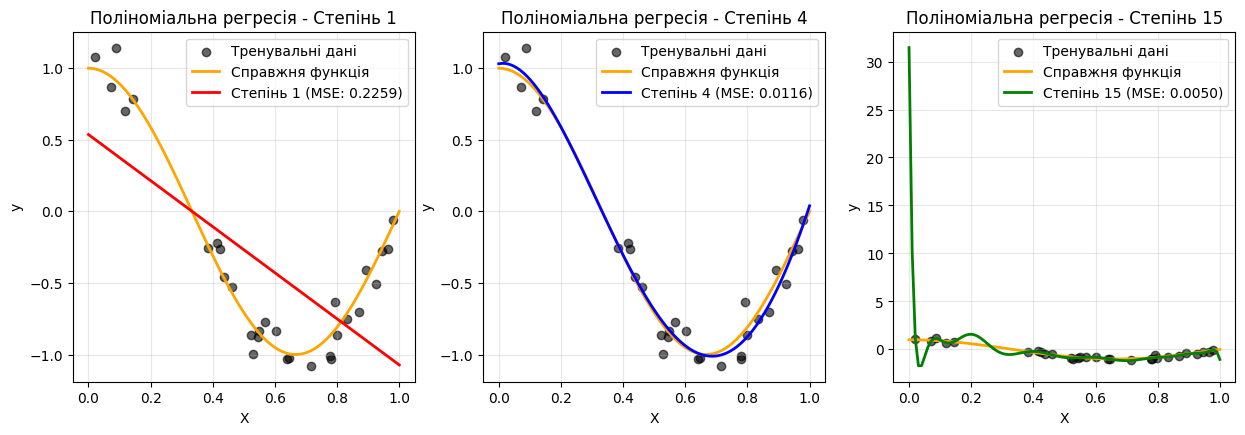

In [64]:
plt.figure(figsize=(15, 10))

degrees = [1, 4, 15]
colors = ['red', 'blue', 'green']

# Тренуємо моделі з різними степенями полінома
for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i + 1)

    # Створюємо поліноміальні ознаки
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test_plot)

    # Тренуємо лінійну регресію на поліноміальних ознаках
    model = LinearRegression()
    model.fit(X_poly, y)

    # Робимо передбачення
    y_pred = model.predict(X_test_poly)
    train_mse = mean_squared_error(y, model.predict(X_poly))

    # Будуємо графік
    plt.scatter(X, y, color='black', alpha=0.6, label='Тренувальні дані')
    plt.plot(X_test, y_true, color='orange', linewidth=2, label='Справжня функція')
    plt.plot(X_test, y_pred, color=colors[i], linewidth=2,
             label=f'Степінь {degree} (MSE: {train_mse:.4f})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Поліноміальна регресія - Степінь {degree}')
    plt.legend()
    plt.grid(True, alpha=0.3)

Зверху видно що в нас перша модель андерфітить, друга нам підходить і третя оверфіт

In [65]:
regularization_methods = [
    ('Ridge (α=0.1)', Ridge(alpha=0.1)),      # L2 регуляризація, слабка
    ('Ridge (α=1.0)', Ridge(alpha=1.0)),      # L2 регуляризація, середня
    ('Lasso (α=0.01)', Lasso(alpha=0.01, max_iter=2000))  # L1 регуляризація
]

# Створюємо поліноміальні ознаки степеня 15
poly_features_15 = PolynomialFeatures(degree=15)
X_poly_15 = poly_features_15.fit_transform(X_train)
X_test_poly_15 = poly_features_15.transform(X_test_plot)


тепер подивимось що робить регуляризація

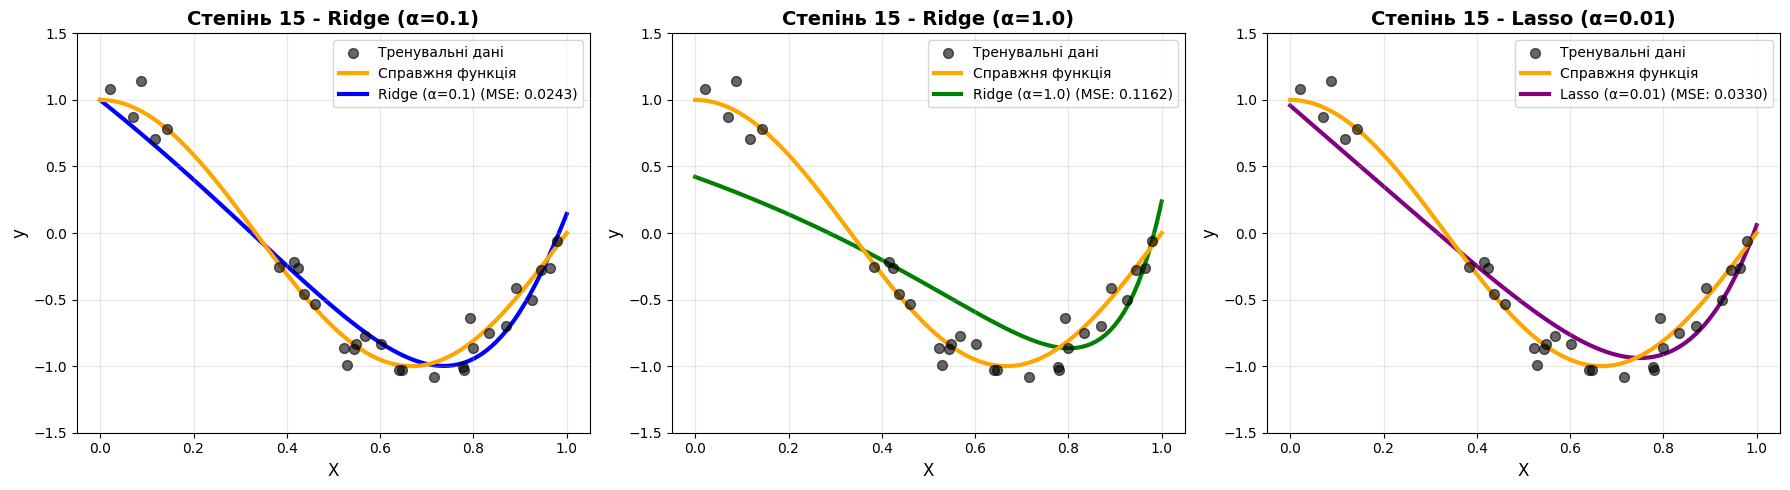

In [66]:
reg_colors = ['blue', 'green', 'purple']
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, model) in enumerate(regularization_methods):
    ax = axes2[i]

    # Тренуємо модель
    model.fit(X_poly_15, y)
    y_pred = model.predict(X_test_poly_15)
    train_mse = mean_squared_error(y, model.predict(X_poly_15))

    # Будуємо графік
    ax.scatter(X, y, color='black', alpha=0.6, s=50, label='Тренувальні дані', zorder=3)
    ax.plot(X_test, y_true, color='orange', linewidth=3, label='Справжня функція', zorder=2)
    ax.plot(X_test, y_pred, color=reg_colors[i], linewidth=3,
             label=f'{name} (MSE: {train_mse:.4f})', zorder=1)
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(f'Степінь 15 - {name}', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()


Насправді круто вийшло, регуляризація допомагає від оверфітінгу, особливо ласо, але як на мене тут всі методи гарно справились. Модель стає більш стабільною і не буде оцих незрозумілих коливань

Problem 2. For this one, you shall be builduing a small full-cycle ML development pipeline.
You are provided with Boston Housing data, but you may find a dataset of your liking to use in place of the suggested one.

1. Load the Boston Housing dataset using sklearn.datasets.load_boston()
- Explore the dataset: check its shape, features, and basic statistics


2. Split the data into features (X) and target variable (y)
- Perform any necessary scaling or normalization of the features
- Split the data into training and testing sets

3. Choose at least two different regression models from scikit-learn (e.g., LinearRegression, RandomForestRegressor, Ridge, Lasso)
- Train each model on the training data

4. Make predictions on the test set using each model
- Calculate and compare the following metrics for each model:
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)

5. Visualize the predicted vs. actual values for each model

In [67]:
from sklearn.datasets import fetch_california_housing

In [68]:
housing = fetch_california_housing()
X, y = housing.data, housing.target


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1028)>

я скачав файл через лінк

In [12]:
housing_data = pd.read_csv('CaliforniaHousing/cal_housing.data', header=None)


longitude: continuous.
latitude: continuous.
housingMedianAge: continuous.
totalRooms: continuous.
totalBedrooms: continuous.
population: continuous.
households: continuous.
medianIncome: continuous.
medianHouseValue: continuous.
feature names from file cal_housing.domain


In [13]:
feature_names = ['Longitude',
                 'Latitude',
                 'HouseAge',
                 'TotalRooms',
                 'TotalBedrooms',
                 'Population',
                 'Households',
                 'MedInc']    #це я з файліка імена фічів переписав в такому ж порядку

In [15]:
# Перші 8 стовпців - це ознаки, останній стовпець - ціна будинку яку треба предіктити
X = housing_data.iloc[:, :-1].values
y = housing_data.iloc[:, -1].values


In [16]:
df = pd.DataFrame(X, columns=feature_names)

In [17]:
df.head()


,Longitude,Latitude,HouseAge,TotalRooms,TotalBedrooms,Population,Households,MedInc
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [24]:
df['MedianHouseValue'] = y


In [25]:
df.head()


,Longitude,Latitude,HouseAge,TotalRooms,TotalBedrooms,Population,Households,MedInc,MedianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [18]:
df.describe()

,Longitude,Latitude,HouseAge,TotalRooms,TotalBedrooms,Population,Households,MedInc
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [19]:
df.shape


(20640, 8)

In [20]:
housing_data.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

базові кроки для перевірки датасету, наче норм. Я думав буду предіктити ціну для конкретних будинків а тут виходить для районів. Ок

In [22]:
X = df.drop('MedianHouseValue', axis=1)
y = df['MedianHouseValue']

In [42]:
df.isnull().sum()

Longitude           0
Latitude            0
HouseAge            0
TotalRooms          0
TotalBedrooms       0
Population          0
Households          0
MedInc              0
MedianHouseValue    0
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(0)

хотів подивитися може є якісь дані які треба дропнути або змінити

відділяємо дату


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Робимо так, щоб всі ознаки мали середнє=0 та стандартне відхилення=1

In [27]:
X_scaled


array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.9744286 ,
        -0.97703285,  2.34476576],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.86143887,
         1.66996103,  2.33223796],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.82077735,
        -0.84363692,  1.7826994 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.3695372 ,
        -0.17404163, -1.14259331],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.60442933,
        -0.39375258, -1.05458292],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.03397701,
         0.07967221, -0.78012947]], shape=(20640, 8))

бачимо що дані нормалізовано тепер

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

розбили по принципу 80/20 (є кращі методи але думаю тут підійде найпростіший)

In [30]:
X_train.shape[0]


16512

In [31]:
X_test.shape[0]

4128

просто перевіряю чи норм розбилось

In [40]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
}

я вирішив для цікавості взяти всі моделі з прикладу подивитися як буде справлятися, для цієї задачі лінійної вистачило б на мою думку

In [45]:
from sklearn.metrics import r2_score

results = {}

for name, model in models.items():
    # Тренуємо модель
    model.fit(X_train, y_train)

    # Робимо передбачення на тренувальній та тестовій вибірках
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Обчислюємо метрики
    train_mse = mean_squared_error(y_train, y_train_pred)  # Mean Squared Error
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)  # Root Mean Squared Error
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)  # R² Score
    test_r2 = r2_score(y_test, y_test_pred)

    # Зберігаємо результати
    results[name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'predictions': y_test_pred
    }

    print(f"{name}:")
    print(f"  Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")
    print(f"  Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"  Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

Linear Regression:
  Train MSE: 4811134397.8842 | Test MSE: 4918556441.4778
  Train RMSE: 69362.3414 | Test RMSE: 70132.4208
  Train R²: 0.6401 | Test R²: 0.6247
Ridge Regression:
  Train MSE: 4811135538.4910 | Test MSE: 4918533710.4748
  Train RMSE: 69362.3496 | Test RMSE: 70132.2587
  Train R²: 0.6401 | Test R²: 0.6247
Lasso Regression:
  Train MSE: 4811134398.6286 | Test MSE: 4918555700.0580
  Train RMSE: 69362.3414 | Test RMSE: 70132.4155
  Train R²: 0.6401 | Test R²: 0.6247
Random Forest:
  Train MSE: 1170379593.5110 | Test MSE: 2594522185.0292
  Train RMSE: 34210.8111 | Test RMSE: 50936.4524
  Train R²: 0.9124 | Test R²: 0.8020


по суті я намагався трохи підібрати параметри під рандом форест бо він перенавчається. Результат все одно в нього кращий, ніж в інших моделей але мені здається що використовувати рандом форест тоді не треба, лінійні моделі себе поводять однаково

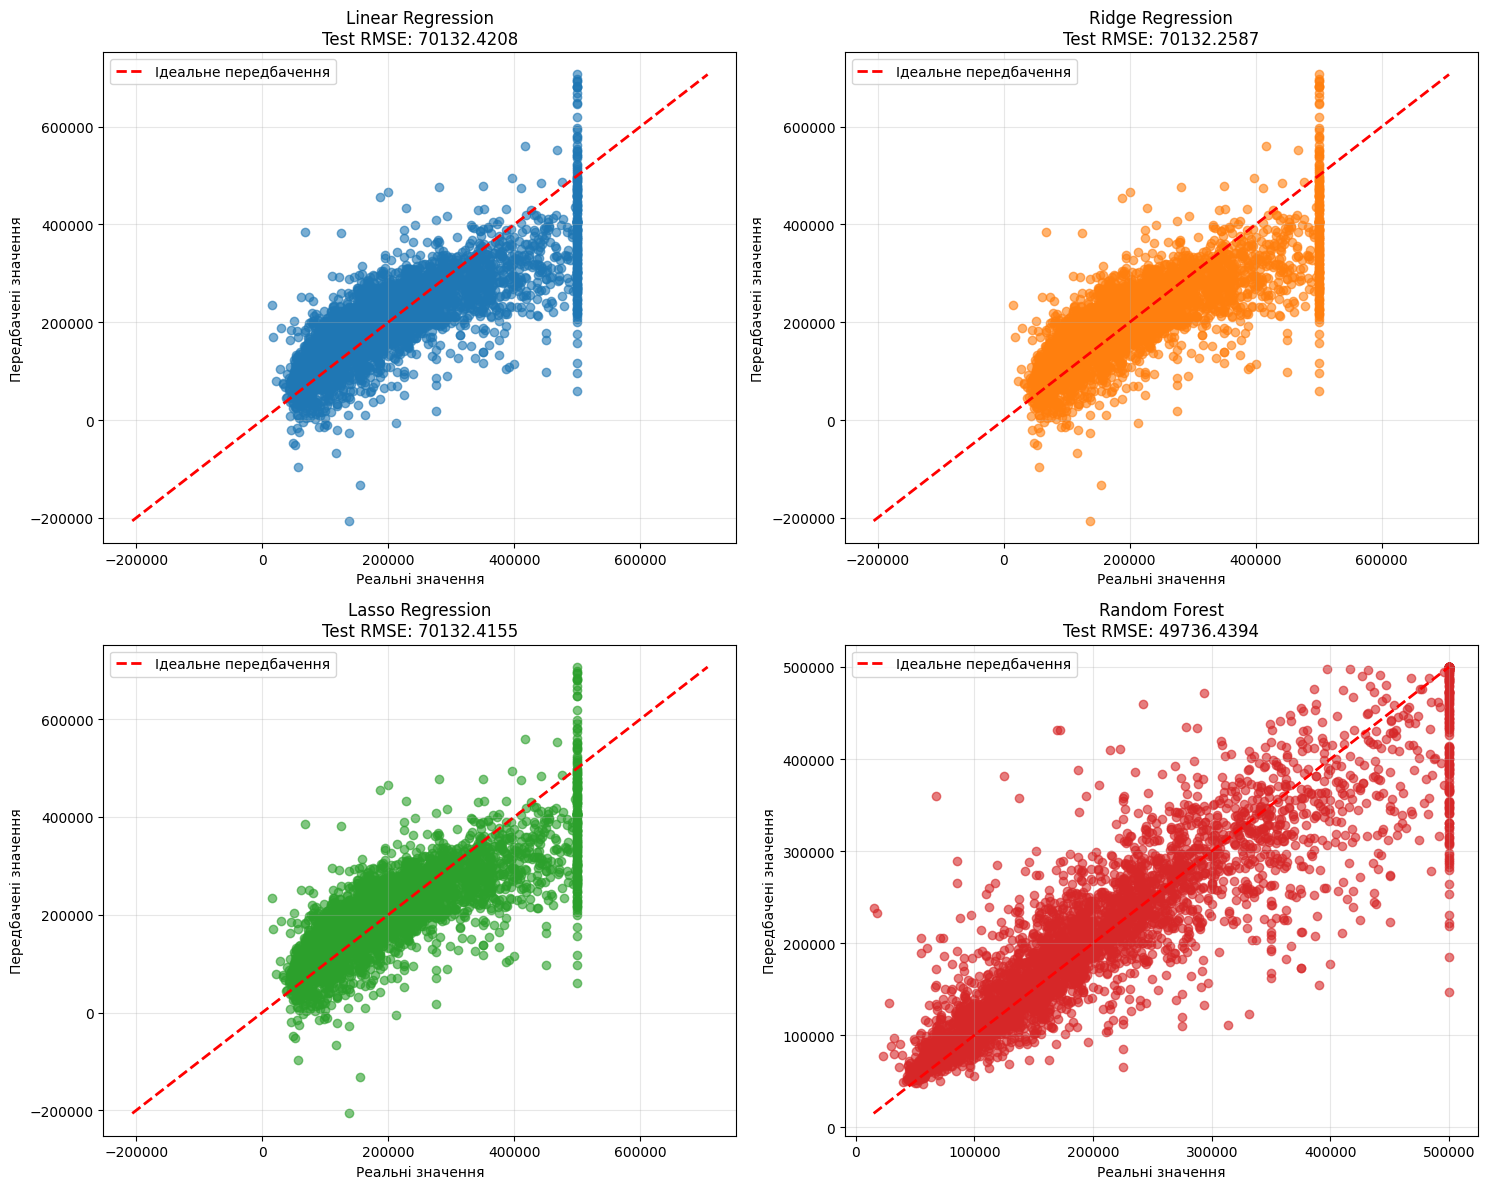

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (name, metrics) in enumerate(results.items()):
    ax = axes[i]

    # Точки: передбачення vs реальні значення
    ax.scatter(y_test, metrics['predictions'], alpha=0.6, color=f'C{i}')

    # Ідеальна лінія (якби передбачення = реальність)
    min_val = min(y_test.min(), metrics['predictions'].min())
    max_val = max(y_test.max(), metrics['predictions'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2,
            label='Ідеальне передбачення')

    ax.set_xlabel('Реальні значення')
    ax.set_ylabel('Передбачені значення')
    ax.set_title(f'{name}\nTest RMSE: {metrics["test_rmse"]:.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


графіки напевно тут непотрібні, не дають якоїсь інфи нормальної. Видно що лінійні моделі максимуми погано передбачають

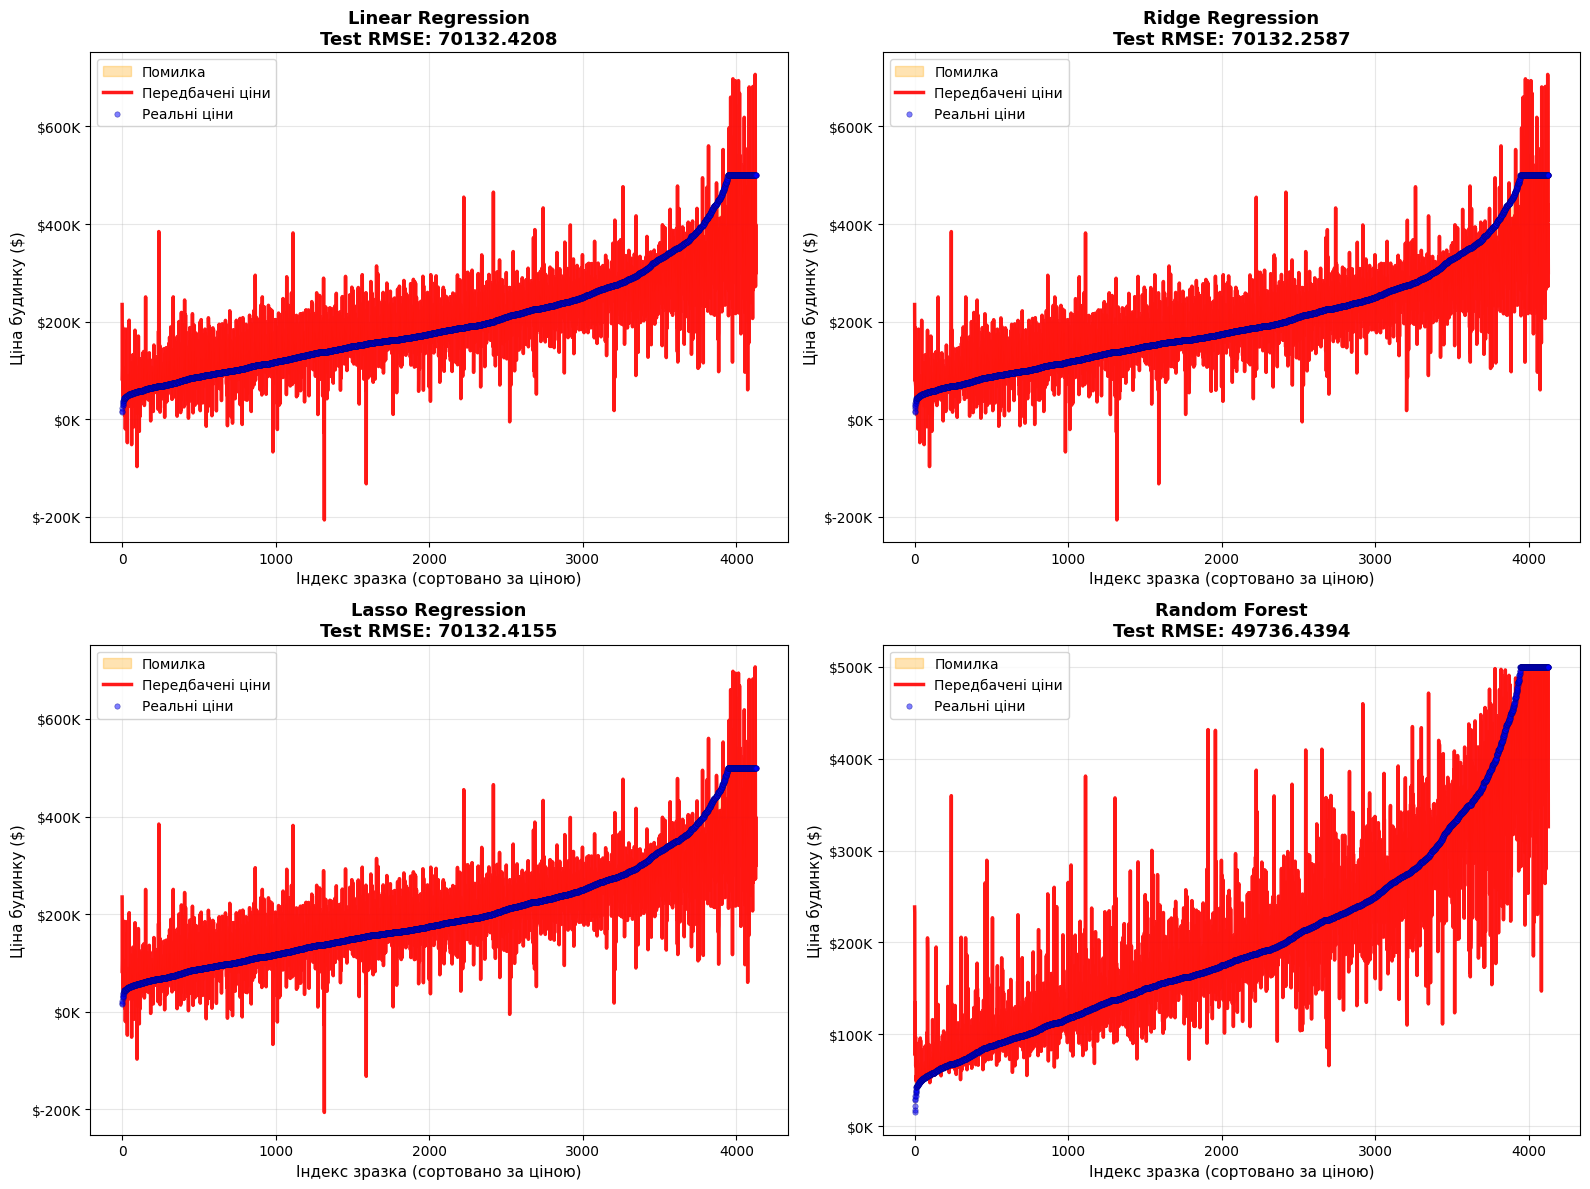

In [39]:

fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))
axes2 = axes2.ravel()

for i, (name, metrics) in enumerate(results.items()):
    ax = axes2[i]

    # Сортуємо дані за реальними значеннями для кращої візуалізації
    sort_idx = np.argsort(y_test)
    y_test_sorted = y_test[sort_idx]
    y_pred_sorted = metrics['predictions'][sort_idx]

    # Створюємо індекси для x-осі
    x_axis = np.arange(len(y_test_sorted))

    # Спочатку область помилки (щоб була на задньому плані)
    ax.fill_between(x_axis, y_test_sorted, y_pred_sorted,
                     alpha=0.3, color='orange', label='Помилка', zorder=1)

    # Потім лінію передбачень
    ax.plot(x_axis, y_pred_sorted, color='red', linewidth=2.5,
            label='Передбачені ціни', zorder=3, alpha=0.9)

    # І нарешті точки реальних значень (на передньому плані)
    ax.scatter(x_axis, y_test_sorted, alpha=0.5, s=15, color='blue',
               label='Реальні ціни', zorder=4, edgecolors='darkblue', linewidth=0.5)

    ax.set_xlabel('Індекс зразка (сортовано за ціною)', fontsize=11)
    ax.set_ylabel('Ціна будинку ($)', fontsize=11)
    ax.set_title(f'{name}\nTest RMSE: {metrics["test_rmse"]:.4f}',
                 fontsize=13, fontweight='bold')
    ax.legend(fontsize=10, loc='upper left')
    ax.grid(True, alpha=0.3, zorder=0)

    # Форматуємо вісь Y для читабельності
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

In [46]:
df.corr()['MedianHouseValue'].sort_values(ascending=False)

MedianHouseValue    1.000000
MedInc              0.688075
TotalRooms          0.134153
HouseAge            0.105623
Households          0.065843
TotalBedrooms       0.050594
Population         -0.024650
Longitude          -0.045967
Latitude           -0.144160
Name: MedianHouseValue, dtype: float64

In [47]:
target = df['MedianHouseValue'].copy()

In [48]:
df['RoomsPerHousehold'] = df['TotalRooms'] / df['Households']
df['BedroomsPerRoom'] = df['TotalBedrooms'] / df['TotalRooms']
df['RoomsPerPerson'] = df['TotalRooms'] / df['Population']
SF_LAT, SF_LON = 37.7749, -122.4194
df['DistanceToSF'] = np.sqrt((df['Latitude'] - SF_LAT)**2 + (df['Longitude'] - SF_LON)**2)

тут я вже просто хочу для себе подивитися як покращити модель граюся. Логічно додати нові фічі + ціна може залежати від місця, координати до сан франциско зверху

In [49]:
df.head()

,Longitude,Latitude,HouseAge,TotalRooms,TotalBedrooms,Population,Households,MedInc,MedianHouseValue,RoomsPerHousehold,BedroomsPerRoom,RoomsPerPerson,DistanceToSF
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.732919,0.216606
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.956685,0.216800
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.957661,0.194485
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.283154,0.185301
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.879646,0.185301


In [50]:
df.describe()

,Longitude,Latitude,HouseAge,TotalRooms,TotalBedrooms,Population,Households,MedInc,MedianHouseValue,RoomsPerHousehold,BedroomsPerRoom,RoomsPerPerson,DistanceToSF
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213075,1.976970,3.878929
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.058023,1.146020,2.498721
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.002547,0.004937
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175426,1.522382,1.207839
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203181,1.937936,5.267492
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239834,2.296090,5.845032
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,55.222222,9.310053


In [51]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.median())

In [52]:
df['MedianHouseValue'] = target

In [53]:
X = df.drop('MedianHouseValue', axis=1)
y = df['MedianHouseValue']

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
X_scaled

array([[-1.32783522,  1.05254828,  0.98214266, ..., -1.1458328 ,
         0.65964658, -1.46571419],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.98717456,
         0.85490577, -1.46563662],
       [-1.33282653,  1.03850269,  1.85618152, ..., -1.44011541,
         0.85575793, -1.47456757],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.03616742,
         0.22806625, -0.73436691],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.11750623,
         0.46523177, -0.75719057],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.1397813 ,
         0.02701694, -0.75847142]], shape=(20640, 12))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [58]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42)
}

results = {}

print("\nРезультати тренування:\n")

for name, model in models.items():
    # Тренуємо модель
    model.fit(X_train, y_train)

    # Робимо передбачення на тренувальній та тестовій вибірках
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Обчислюємо метрики
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Зберігаємо результати
    results[name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'predictions': y_test_pred
    }

    print(f"{name}:")
    print(f"  Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")
    print(f"  Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"  Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")



Результати тренування:

Linear Regression:
  Train MSE: 4501090190.7224 | Test MSE: 4607565142.5947
  Train RMSE: 67090.1646 | Test RMSE: 67879.0479
  Train R²: 0.6633 | Test R²: 0.6484
Ridge Regression:
  Train MSE: 4501091332.3304 | Test MSE: 4607567741.1163
  Train RMSE: 67090.1731 | Test RMSE: 67879.0670
  Train R²: 0.6633 | Test R²: 0.6484
Lasso Regression:
  Train MSE: 4501090191.7183 | Test MSE: 4607565418.5641
  Train RMSE: 67090.1646 | Test RMSE: 67879.0499
  Train R²: 0.6633 | Test R²: 0.6484
Random Forest:
  Train MSE: 1069256306.9658 | Test MSE: 2414462636.3039
  Train RMSE: 32699.4848 | Test RMSE: 49137.1818
  Train R²: 0.9200 | Test R²: 0.8157


Linear Regression:
  Train MSE: 4811134397.8842 | Test MSE: 4918556441.4778
  Train RMSE: 69362.3414 | Test RMSE: 70132.4208
  Train R²: 0.6401 | Test R²: 0.6247
Ridge Regression:
  Train MSE: 4811135538.4910 | Test MSE: 4918533710.4748
  Train RMSE: 69362.3496 | Test RMSE: 70132.2587
  Train R²: 0.6401 | Test R²: 0.6247
Lasso Regression:
  Train MSE: 4811134398.6286 | Test MSE: 4918555700.0580
  Train RMSE: 69362.3414 | Test RMSE: 70132.4155
  Train R²: 0.6401 | Test R²: 0.6247
Random Forest:
  Train MSE: 1170379593.5110 | Test MSE: 2594522185.0292
  Train RMSE: 34210.8111 | Test RMSE: 50936.4524
  Train R²: 0.9124 | Test R²: 0.8020

ну точно можна добитися кращих результатів якщо нормальні фічі придумати і ще якісь трюки провернути.

у висновок можна сказати що рандом форест перенавчається, але все одно перформить краще за лінійні моделі, я правда не впевнений що з такою різницею на тест трейн дати його можна юзати, можливо длч рандом форесту підходить інший формат розбиття дати.
